# Example notebook : analyse classification performance

## Load packages

In [6]:
from transparentai.datasets import load_iris
from transparentai.models import ClassificationModel

import numpy as np
from sklearn.tree import DecisionTreeClassifier
import pickle

## Load adult dataset

In [2]:
iris = load_iris()

## Prepare and train the model

In [3]:
target = 'iris plant'
target_value = {'setosa':1, 'versicolor':2, 'virginica':3}
iris[target] = iris[target].replace(target_value)

In [4]:
X, y = iris.drop(columns=target), iris[target]

In [5]:
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Save for future notebooks

In [7]:
with open('save/model_multi_label_classification.pkl', mode='wb') as file:
    pickle.dump(clf,file)
file.close()

## Use ClassificationModel class

In [6]:
model = ClassificationModel(model=clf)
model.compute_scores(X=X, y=y)

### Overall model performance

,accuracy,f1,precision,recall,roc_auc
score,0.96,0.96,0.96,0.96,"{1: 1.0, 2: 0.97, 3: 0.97}"


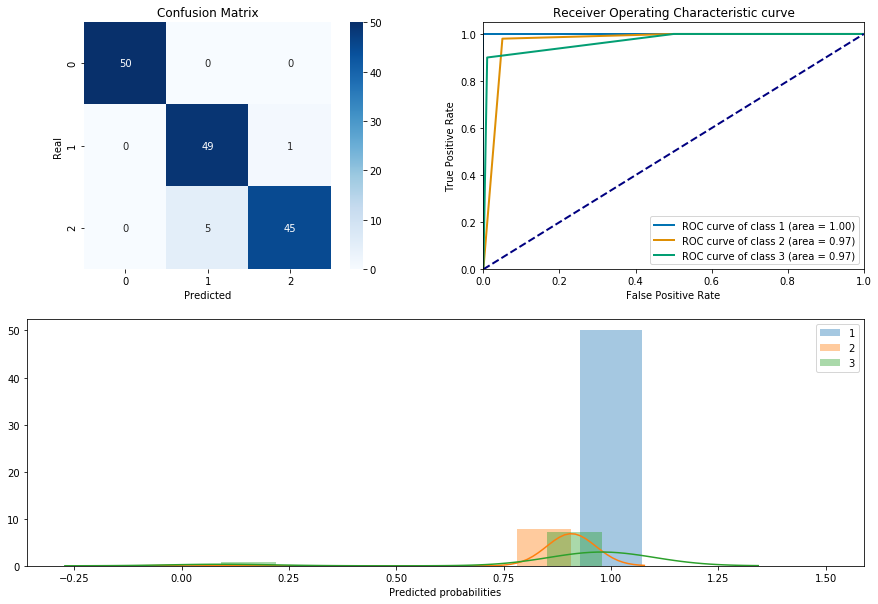

In [7]:
model.plot_scores()

## Save performance metrics

In [8]:
model.scores_to_json()

{'accuracy': 0.96,
 'f1': 0.96,
 'precision': 0.96,
 'recall': 0.96,
 'roc_auc': {1: 1.0, 2: 0.97, 3: 0.97}}

In [9]:
model.save_scores(fname='save/iris_model_performance.json')

## The end.